# 영화 데이터 분석

```
철수는 최근에 한국에서 개봉한 영화들이 어떤 소재로 이루어졌으며, 각각의 소재 별로 매출이 얼마나 발생했는지를 조사하고자 한다.
개봉 스크린 수, 장르와 같은 정형 데이터 외에, 줄거리와 같은 텍스트 데이터를 추가로 이용하여  매출액 예측에 사용할 예정이다.

movie_plot.csv (구분자: comma(“,”), 1,002 Rows, 8 Columns)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from konlpy.tag import Okt

# 경고 무시
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/movie_plot.csv')
df.head()

title      revenue  screen  open country    mpaa  \
0                             라이언  515370900.0  1287.0  2017      기타  12세관람가   
1                         스윗 프랑세즈   93583800.0   635.0  2015      기타  15세관람가   
2                      초한지 - 천하대전  609188000.0  1077.0  2012      기타  12세관람가   
3                         레이디 채털리   43385500.0    32.0  2007      기타  18세관람가   
4  극장판 에그엔젤 코코밍: 푸르밍과 두근두근 코코밍 세계  712972600.0  1222.0  2017      기타   전체관람가   

  genre                                               plot  
0   드라마  인생에서 두 번의 기적을 만든 남자 25년만에 집으로 향하는 그의 오랜 지도가 새롭...  
1    멜로  1940년  독일이 점령한 프랑스 뷔시 사랑은 끝나지 않았다    매일 밤  그의 ...  
2    액션  이기는 자가 천하를 얻게 된다  진시황 이후 최고의 패자로 올라선 항우 풍소봉 역 ...  
3    멜로  만지고 싶은 사랑    제1차 세계대전이 끝나고 불구가 되어 돌아온 남편을 보살피는...  
4    기타  코코밍 엔젤 총출동  세상을 지키기 위한 대모험이 시작된다  코코밍이라면 누구나 꿈...

```
분석에 앞서 Plot 에 대해 다음 처리를 수행한다.
- 숫자는 모두 제거하고, stopwords.csv에 있는 불용어를 제거하고, 다음 유의어를 대체한다.
단, 형태소 분석시 명사만 추출하고, 그외 옵션은 디폴트로 한다.
엄마 -> 어머니	
아빠 -> 아버지	
여인, 그녀 -> 여자	
세상 -> 세계	
- 왜도의 절대값이 1초과인 수치형 변수에 대해서는 log 변환(자연로그 변환)한다. 
```

In [3]:
stopwords = pd.read_csv('data/stopwords.csv')
stopwords.head()

제거목록
0   위해
1   과연
2   하다
3   되다
4    그

In [4]:
# 제거목록을 list로 출력
stopwords = stopwords['제거목록'].# 코드입력
stopwords

['위해',
 '과연',
 '하다',
 '되다',
 '그',
 '있다',
 '한',
 '것',
 '수',
 '이',
 '않다',
 '날',
 '년',
 '의',
 '어느',
 '알',
 '속',
 '두',
 '를',
 '일',
 '은',
 '전',
 '곳',
 '와',
 '살',
 '버리다',
 '되어다',
 '위',
 '온',
 '중',
 '후',
 '이다',
 '대한',
 '더',
 '안',
 '구',
 '내',
 '채',
 '없이',
 '등',
 '단',
 '명의',
 '인',
 '만',
 '과',
 '내다',
 '건',
 '또',
 '바로',
 '개',
 '명의',
 '스',
 '로',
 '제',
 '첫',
 '남',
 '다',
 '어느',
 '사',
 '반',
 '로부터',
 '치',
 '히',
 '뿐',
 '음',
 '선',
 '번',
 '듯',
 '도',
 '준',
 '자',
 '처',
 '리',
 '네',
 '달리',
 '간',
 '부',
 '게',
 '무',
 '소',
 '돼다',
 '카',
 '생',
 '통',
 '새',
 '존',
 '감',
 '무도',
 '초',
 '대해',
 '걸',
 '기',
 '열',
 '대신',
 '린',
 '주',
 '나선',
 '잭',
 '너',
 '친',
 '었',
 '에서',
 '없다',
 '데',
 '톰',
 '성',
 '곧',
 '바',
 '노',
 '앤',
 '마이클',
 '폴',
 '우',
 '마',
 '낼',
 '예',
 '애',
 '파',
 '무슨',
 '장',
 '오',
 '몇',
 '임',
 '하자',
 '제임스',
 '줄리',
 '최',
 '보',
 '전이',
 '늘다']

[한글 형태소 분석기(KoNLPy)](https://konlpy-ko.readthedocs.io/ko/v0.4.3/)

In [5]:
# 형태소 분석기
okt = Okt()
# morphs
okt.morphs(df.loc[0, 'plot'])

['인생',
 '에서',
 '두',
 '번의',
 '기적',
 '을',
 '만든',
 '남자',
 '25년',
 '만에',
 '집',
 '으로',
 '향',
 '하는',
 '그',
 '의',
 '오랜',
 '지도',
 '가',
 '새롭게',
 '펼쳐진다',
 '5',
 '살',
 '인도',
 '에서',
 '호주',
 '까지',
 '7',
 '600',
 'km',
 '의',
 '거리',
 '형',
 '을',
 '기다리다',
 '기차',
 '에서',
 '깜빡',
 '잠들어',
 '버린',
 '다섯',
 '살',
 '사루',
 '는',
 '집',
 '에서',
 '수천',
 '킬로미터',
 '떨어진',
 '곳',
 '에서',
 '눈',
 '을',
 '뜨게',
 '된다',
 '낯선',
 '기차역',
 '에',
 '홀로',
 '남겨진',
 '사루',
 '는',
 '보고',
 '싶은',
 '엄마',
 '와',
 '형',
 '을',
 '애',
 '타게',
 '불러',
 '보지',
 '만',
 '기억나는',
 '것',
 '은',
 '형',
 '구',
 '뚜',
 '의',
 '이름',
 '과',
 '정확하지',
 '않은',
 '동네',
 '이름',
 '뿐',
 '수',
 '개월',
 '동안',
 '이',
 '곳',
 '저',
 '곳',
 '을',
 '떠돌며',
 '힘겹게',
 '살아가던',
 '사루',
 '는',
 '결국',
 '인도',
 '를',
 '떠나',
 '호주',
 '에',
 '살',
 '고',
 '있는',
 '새로운',
 '가족',
 '곁',
 '으로',
 '가게',
 '된다',
 '30',
 '살',
 '호주',
 '에서',
 '인도',
 '까지',
 '25년',
 '의',
 '시간',
 '성인',
 '이',
 '된',
 '사루',
 '는',
 '대학원',
 '에서',
 '우연히',
 '인도',
 '친구',
 '들',
 '을',
 '만나게',
 '되면서',
 '잊고',
 '있었던',
 '어린',
 '시절',
 '에',
 '대한',
 '기억',
 '이',
 '떠올라

In [6]:
# pos
okt.pos(df.loc[0, 'plot'])

[('인생', 'Noun'),
 ('에서', 'Josa'),
 ('두', 'Noun'),
 ('번의', 'Noun'),
 ('기적', 'Noun'),
 ('을', 'Josa'),
 ('만든', 'Verb'),
 ('남자', 'Noun'),
 ('25년', 'Number'),
 ('만에', 'Foreign'),
 ('집', 'Noun'),
 ('으로', 'Josa'),
 ('향', 'Noun'),
 ('하는', 'Verb'),
 ('그', 'Noun'),
 ('의', 'Josa'),
 ('오랜', 'Adverb'),
 ('지도', 'Noun'),
 ('가', 'Josa'),
 ('새롭게', 'Adjective'),
 ('펼쳐진다', 'Verb'),
 ('5', 'Number'),
 ('살', 'Noun'),
 ('인도', 'Noun'),
 ('에서', 'Josa'),
 ('호주', 'Noun'),
 ('까지', 'Josa'),
 ('7', 'Number'),
 ('600', 'Number'),
 ('km', 'Alpha'),
 ('의', 'Noun'),
 ('거리', 'Noun'),
 ('형', 'Noun'),
 ('을', 'Josa'),
 ('기다리다', 'Verb'),
 ('기차', 'Noun'),
 ('에서', 'Josa'),
 ('깜빡', 'Noun'),
 ('잠들어', 'Verb'),
 ('버린', 'Verb'),
 ('다섯', 'Noun'),
 ('살', 'Noun'),
 ('사루', 'Noun'),
 ('는', 'Verb'),
 ('집', 'Noun'),
 ('에서', 'Josa'),
 ('수천', 'Noun'),
 ('킬로미터', 'Noun'),
 ('떨어진', 'Verb'),
 ('곳', 'Noun'),
 ('에서', 'Josa'),
 ('눈', 'Noun'),
 ('을', 'Josa'),
 ('뜨게', 'Verb'),
 ('된다', 'Verb'),
 ('낯선', 'Noun'),
 ('기차역', 'Noun'),
 ('에', 'Josa'),
 ('

In [7]:
# Noun 인 것만 필터 (pos 활용)
# 코드 입력


['인생',
 '번의',
 '기적',
 '남자',
 '집',
 '향',
 '지도',
 '인도',
 '호주',
 '거리',
 '형',
 '기차',
 '깜빡',
 '다섯',
 '사루',
 '집',
 '수천',
 '킬로미터',
 '눈',
 '낯선',
 '기차역',
 '홀로',
 '사루',
 '보고',
 '엄마',
 '형',
 '보지',
 '형',
 '뚜',
 '이름',
 '동네',
 '이름',
 '개월',
 '동안',
 '사루',
 '인도',
 '호주',
 '가족',
 '곁',
 '가게',
 '호주',
 '인도',
 '시간',
 '성인',
 '사루',
 '대학원',
 '인도',
 '친구',
 '시절',
 '기억',
 '혼란',
 '자신',
 '엄마',
 '형',
 '생각',
 '사루',
 '구글어스',
 '전세계',
 '어디',
 '친구',
 '말',
 '희망',
 '집',
 '길',
 '다시',
 '찾기',
 '시작']

In [8]:
# 위에서 생성한 list를 띄어쓰기로 연결 (join)
# 코드입력


'인생 번의 기적 남자 집 향 지도 인도 호주 거리 형 기차 깜빡 다섯 사루 집 수천 킬로미터 눈 낯선 기차역 홀로 사루 보고 엄마 형 보지 형 뚜 이름 동네 이름 개월 동안 사루 인도 호주 가족 곁 가게 호주 인도 시간 성인 사루 대학원 인도 친구 시절 기억 혼란 자신 엄마 형 생각 사루 구글어스 전세계 어디 친구 말 희망 집 길 다시 찾기 시작'

In [9]:
def clean_sentence(x):
    return # 코드입력 (위에서 작성한 코드 입력)

In [10]:
# 전처리 (clean_sentence)
df['plot'] = df['plot'].# 코드입력
df['plot'].head()

0    인생 번의 기적 남자 집 향 지도 인도 호주 거리 형 기차 깜빡 다섯 사루 집 수천...
1    독일 점령 프랑스 뷔시 사랑 매일 밤 연주 음악 공부 프랑스 여인 루실 저택 독일 ...
2    자가 천하 진시황 이후 최고 패자 항우 봉 역 그릇 세상 영웅 한나라 유방 여명 역...
3    지고 사랑 차 세계대전 불구 남편 레이디 무기력증 그녀 만난 사냥터 지기 파킨 자신...
4    코코 밍 엔젤 출동 세상 모험 시작 코코 밍 라면 누구 코코 밍 세계 초대 미소 코...
Name: plot, dtype: object

In [11]:
# 왜도의 절대값이 1초과인 수치형 변수에 대해서는 log 변환(자연로그 변환)한다
# 왜도 값 확인
df[['revenue', 'screen', 'open']].# 코드입력

revenue    2.323988
screen     1.642103
open      -0.419595
dtype: float64

In [12]:
# 왜도 절대값이 1초과인 변수에 대하여 로그 변환
df[['revenue', 'screen']] = # 코드입력

## Q 1

```
영화 제작 국가(country)가 ‘한국’이 아닌 데이터를 training set, ‘한국’인 데이터를 test set으로 한다. training set의 open, mppa, genre에 대해 더미변수를 생성(더미변수의 수는 범주의 수와 동일하게 한다)하고, test set에도 training set과 동일한 규칙으로 더미변수를 생성하고, 개봉 첫 주의 매출(revenue)을 예측하기 위한 다음 두 모델의 mape 차(절대값)를 구하시오.
이때, 만일 1번에서 revenue에 log를 취했다면, log_revenue를 예측하는 모델을 생성한다. 

- 모델 1 : Training set을 활용하여, feature 변수를 screen (만일 screen이 1번에서 log를 취했다면, log를 취한 값을 feature로 한다)과 더미변수로 모델을 학습한 후, test set으로 모델 평가
- 모델 2: Training set을 활용하여, feature변수, 전처리를 끝낸 Plot의 Doc2Vec의 결과(Vector의 Dimension은 10차원으로 할 것), test set에도 Training set의 Doc2Vec 결과를 동일하게 적용한 후, test set으로 모델 평가
소수점 셋째 자리 아래는 버리고, 소수점 셋째 자리까지 기술하시오.
(답안예시) 89.123
```

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    1002 non-null   object 
 1   revenue  1002 non-null   float64
 2   screen   1002 non-null   float64
 3   open     1002 non-null   int64  
 4   country  1002 non-null   object 
 5   mpaa     1002 non-null   object 
 6   genre    1002 non-null   object 
 7   plot     1002 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.8+ KB


In [14]:
df['open'] = df['open'].astype('str')

In [15]:
# open, mppa, genre에 대해 더미변수를 생성
df_dummies = pd.# 코드입력
df_dummies

open_2004  open_2005  open_2006  open_2007  open_2008  open_2009  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          1          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
997           0          0          0          0          0          0   
998           0          0          0          0          0          0   
999           0          0          0          0          0          0   
1000          0          0          0          0          0          0   
1001          0          0          0          0          0          0   

      open_2010  open_2011  open_2012  open_2013  ...  genre_뮤지컬  genre_범죄  \
0             0          0          0          0  ...          0         0   
1             0          0          0          0  ...          0         0   
2             0          0          1          0  ...          0         0   
3             0          0          0          0  ...          0         0   
4             0          0          0          0  ...          0         0   
...         ...        ...        ...        ...  ...        ...       ...   
997           0          0          0          1  ...          0         0   
998           1          0          0          0  ...          0         0   
999           0          0          0          0  ...          0         0   
1000          0          0          0          0  ...          0         0   
1001          0          0          0          0  ...          0         0   

      genre_사극  genre_성인물  genre_스릴러  genre_액션  genre_어드벤처  genre_전쟁  \
0            0          0          0         0           0         0   
1            0          0          0         0           0         0   
2            0          0          0         1           0         0   
3            0          0          0         0           0         0   
4            0          0          0         0           0         0   
...        ...        ...        ...       ...         ...       ...   
997          0          0          0         1           0         0   
998          0          0          0         0           0         0   
999          0          0          0         1           0         0   
1000         0          0          0         0           0         0   
1001         0          0          0         0           0         0   

      genre_코미디  genre_판타지  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
...         ...        ...  
997           0          0  
998           0          0  
999           0          0  
1000          0          0  
1001          0          0  

[1002 rows x 34 columns]

In [16]:
# 'revenue', 'screen', 'country'의 컬럼과, 더미변수 연결(concat)
df1 = pd.concat([df[['revenue', 'screen', 'country']], df_dummies], axis=1)
df1

revenue    screen country  open_2004  open_2005  open_2006  open_2007  \
0     20.060397  7.160069      기타          0          0          0          0   
1     18.354368  6.453625      기타          0          0          0          0   
2     20.227637  6.981935      기타          0          0          0          0   
3     17.585636  3.465736      기타          0          0          0          1   
4     20.384954  7.108244      기타          0          0          0          0   
...         ...       ...     ...        ...        ...        ...        ...   
997   14.520092  2.833213      기타          0          0          0          0   
998   14.894090  4.094345      기타          0          0          0          0   
999   13.930623  1.945910      기타          0          0          0          0   
1000  20.513685  7.731053      미국          0          0          0          0   
1001  18.491492  5.583496      기타          0          0          0          0   

      open_2008  open_2009  open_2010  ...  genre_뮤지컬  genre_범죄  genre_사극  \
0             0          0          0  ...          0         0         0   
1             0          0          0  ...          0         0         0   
2             0          0          0  ...          0         0         0   
3             0          0          0  ...          0         0         0   
4             0          0          0  ...          0         0         0   
...         ...        ...        ...  ...        ...       ...       ...   
997           0          0          0  ...          0         0         0   
998           0          0          1  ...          0         0         0   
999           0          0          0  ...          0         0         0   
1000          0          0          0  ...          0         0         0   
1001          0          0          0  ...          0         0         0   

      genre_성인물  genre_스릴러  genre_액션  genre_어드벤처  genre_전쟁  genre_코미디  \
0             0          0         0           0         0          0   
1             0          0         0           0         0          0   
2             0          0         1           0         0          0   
3             0          0         0           0         0          0   
4             0          0         0           0         0          0   
...         ...        ...       ...         ...       ...        ...   
997           0          0         1           0         0          0   
998           0          0         0           0         0          0   
999           0          0         1           0         0          0   
1000          0          0         0           0         0          0   
1001          0          0         0           0         0          0   

      genre_판타지  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
997           0  
998           0  
999           0  
1000          0  
1001          0  

[1002 rows x 37 columns]

In [17]:
# 한국과 한국 아닌 지역으로 train/test split
test_1 = df1.loc[# 코드입력]
train_1 = df1.loc[# 코드입력]

In [18]:
train_1.head()

revenue    screen country  open_2004  open_2005  open_2006  open_2007  \
0  20.060397  7.160069      기타          0          0          0          0   
1  18.354368  6.453625      기타          0          0          0          0   
2  20.227637  6.981935      기타          0          0          0          0   
3  17.585636  3.465736      기타          0          0          0          1   
4  20.384954  7.108244      기타          0          0          0          0   

   open_2008  open_2009  open_2010  ...  genre_뮤지컬  genre_범죄  genre_사극  \
0          0          0          0  ...          0         0         0   
1          0          0          0  ...          0         0         0   
2          0          0          0  ...          0         0         0   
3          0          0          0  ...          0         0         0   
4          0          0          0  ...          0         0         0   

   genre_성인물  genre_스릴러  genre_액션  genre_어드벤처  genre_전쟁  genre_코미디  genre_판타지  
0          0          0         0           0         0          0          0  
1          0          0         0           0         0          0          0  
2          0          0         1           0         0          0          0  
3          0          0         0           0         0          0          0  
4          0          0         0           0         0          0          0  

[5 rows x 37 columns]

In [19]:
x_train_1 = train_1.drop(['revenue', 'country'], 1)
y_train_1 = train_1['revenue']
x_test_1 = test_1.drop(['revenue', 'country'], 1)
y_test_1 = test_1['revenue']

In [20]:
# 모델 1 : Training set을 활용하여, feature 변수를 screen (만일 screen이 1번에서 log를 취했다면, 
#         log를 취한 값을 feature로 한다)과 더미변수로 모델을 학습한 후, test set으로 모델 평가
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfr = RandomForestRegressor(random_state=123)
rfr.fit(x_train_1, y_train_1)

RandomForestRegressor(random_state=123)

In [22]:
pred = rfr.predict(x_test_1)
pred[:5]

array([19.52396335, 15.97783695, 15.93814701, 16.65964409, 17.76598885])

![](https://blog.olivehorse.com/hubfs/APO%20Blogs/Forecast%20Errors/MAPE.jpeg)

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return # 코드입력

In [24]:
mean_absolute_percentage_error(y_test_1, pred)

5.759049733031585

In [25]:
# 모델 2: Training set을 활용하여, feature변수, 전처리를 끝낸 Plot의 Doc2Vec의 결과(Vector의 Dimension은 10차원으로 할 것), 
#         test set에도 Training set의 Doc2Vec 결과를 동일하게 적용한 후, test set으로 모델 평가
#         소수점 셋째 자리 아래는 버리고, 소수점 셋째 자리까지 기술하시오.

In [26]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [27]:
# 단어사전 생성 (tag=문장index, words는 토큰)
tagged_data = [TaggedDocument(words=w.split(), tags=[str(i)]) for i, w in enumerate(df['plot'])]
tagged_data[:2]

[TaggedDocument(words=['인생', '번의', '기적', '남자', '집', '향', '지도', '인도', '호주', '거리', '형', '기차', '깜빡', '다섯', '사루', '집', '수천', '킬로미터', '눈', '낯선', '기차역', '홀로', '사루', '보고', '엄마', '형', '보지', '형', '뚜', '이름', '동네', '이름', '개월', '동안', '사루', '인도', '호주', '가족', '곁', '가게', '호주', '인도', '시간', '성인', '사루', '대학원', '인도', '친구', '시절', '기억', '혼란', '자신', '엄마', '형', '생각', '사루', '구글어스', '전세계', '어디', '친구', '말', '희망', '집', '길', '다시', '찾기', '시작'], tags=['0']),
 TaggedDocument(words=['독일', '점령', '프랑스', '뷔시', '사랑', '매일', '밤', '연주', '음악', '공부', '프랑스', '여인', '루실', '저택', '독일', '장교', '브루노', '경계', '자신', '마음', '연', '잠시', '전부', '전쟁', '모든', '버거운', '독일', '장교', '브루노', '오직', '피아노', '위로', '일상', '자신', '그녀', '점점', '희망', '우린', '만날', '거', '다른', '모습', '모두', '사랑', '전쟁', '점점', '하나', '시크릿', '로맨스'], tags=['1'])]

[Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)

In [28]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

max_epochs = 100
# 10차원 (문제 요구사항)
vec_size = 10

model = Doc2Vec(size=vec_size,
                min_count=1,
                workers=4
               )

In [29]:
# 단어 사전 생성
model.build_vocab(tagged_data)

In [30]:
# epoch 반복하며 학습
for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)

In [31]:
# 1002개 문장에 대한 차원 vector 생성
docvecs = np.zeros(shape=(df.shape[0], vec_size))
docvecs.shape

(1002, 10)

In [32]:
# 학습된 vector를 대입
for i in range(df.shape[0]):
    docvecs[i] = model.docvecs[i]

In [33]:
docvecs[:3]

array([[-8.08626938, -5.54544544,  6.08379841, -2.2526269 ,  2.6642704 ,
        10.65324974,  5.50603628, -4.75728798,  4.5989337 , -3.59828711],
       [-4.83494806, -4.39200258, -2.94650483,  6.68381548, -2.28141356,
         6.9117775 ,  5.41572332, -2.63687038,  0.54710954, -1.20297837],
       [-7.36760712, -6.69393253, -8.19269085, -4.09477711,  5.97529316,
        -6.47383165, 11.87799168, -3.27605677,  4.84181547, -1.61157548]])

In [34]:
# docvecs와 [df[['revenue', 'screen', 'country']] 병합
df2 = pd.concat([df[['revenue', 'screen', 'country']], pd.DataFrame(docvecs)], axis=1)
df2.head()

revenue    screen country         0          1          2         3  \
0  20.060397  7.160069      기타 -8.086269  -5.545445   6.083798 -2.252627   
1  18.354368  6.453625      기타 -4.834948  -4.392003  -2.946505  6.683815   
2  20.227637  6.981935      기타 -7.367607  -6.693933  -8.192691 -4.094777   
3  17.585636  3.465736      기타 -4.847932   0.921011 -14.448863  4.900811   
4  20.384954  7.108244      기타  2.472173 -13.507808   3.638968  3.006259   

          4          5          6         7         8         9  
0  2.664270  10.653250   5.506036 -4.757288  4.598934 -3.598287  
1 -2.281414   6.911777   5.415723 -2.636870  0.547110 -1.202978  
2  5.975293  -6.473832  11.877992 -3.276057  4.841815 -1.611575  
3 -7.032388   6.095565   2.333697 -0.582088  5.003819  0.100229  
4  0.919195  -2.443190  10.937201 -8.239012  3.747764 -2.610604

In [35]:
# 한국/ 한국 안닌 국가 train/test split
test_2 = df2.loc[df2['country'] == '한국']
train_2 = df2.loc[~(df2['country'] == '한국')]
train_2.head()

revenue    screen country         0          1          2         3  \
0  20.060397  7.160069      기타 -8.086269  -5.545445   6.083798 -2.252627   
1  18.354368  6.453625      기타 -4.834948  -4.392003  -2.946505  6.683815   
2  20.227637  6.981935      기타 -7.367607  -6.693933  -8.192691 -4.094777   
3  17.585636  3.465736      기타 -4.847932   0.921011 -14.448863  4.900811   
4  20.384954  7.108244      기타  2.472173 -13.507808   3.638968  3.006259   

          4          5          6         7         8         9  
0  2.664270  10.653250   5.506036 -4.757288  4.598934 -3.598287  
1 -2.281414   6.911777   5.415723 -2.636870  0.547110 -1.202978  
2  5.975293  -6.473832  11.877992 -3.276057  4.841815 -1.611575  
3 -7.032388   6.095565   2.333697 -0.582088  5.003819  0.100229  
4  0.919195  -2.443190  10.937201 -8.239012  3.747764 -2.610604

In [36]:
x_train_2 = train_2.drop(['revenue', 'country'], 1)
y_train_2 = train_2['revenue']
x_test_2 = test_2.drop(['revenue', 'country'], 1)
y_test_2 = test_2['revenue']
x_train_2.head()

screen         0          1          2         3         4          5  \
0  7.160069 -8.086269  -5.545445   6.083798 -2.252627  2.664270  10.653250   
1  6.453625 -4.834948  -4.392003  -2.946505  6.683815 -2.281414   6.911777   
2  6.981935 -7.367607  -6.693933  -8.192691 -4.094777  5.975293  -6.473832   
3  3.465736 -4.847932   0.921011 -14.448863  4.900811 -7.032388   6.095565   
4  7.108244  2.472173 -13.507808   3.638968  3.006259  0.919195  -2.443190   

           6         7         8         9  
0   5.506036 -4.757288  4.598934 -3.598287  
1   5.415723 -2.636870  0.547110 -1.202978  
2  11.877992 -3.276057  4.841815 -1.611575  
3   2.333697 -0.582088  5.003819  0.100229  
4  10.937201 -8.239012  3.747764 -2.610604

In [37]:
rfr = RandomForestRegressor(random_state=123)
rfr.fit(x_train_2, y_train_2)

RandomForestRegressor(random_state=123)

In [38]:
pred = rfr.predict(x_test_2)
pred[:5]

array([17.87040536, 15.58818749, 15.06777717, 16.98134407, 18.11751363])

In [39]:
mean_absolute_percentage_error(y_test_2, pred) - mean_absolute_percentage_error(y_test_1, pred)

0.0

## Q 2

```
단어들 간의 연관성을 확인하고자 한다. 
전처리를 끝낸 Plot의 최빈 단어 10,000를 대상으로 두 단어가 동시에 등장하는 횟수를 집계한 후, 그 횟수의 top50개에 대해 Network차트로 시각화 하시오.
```

In [40]:
from collections import Counter

In [41]:
model.wv.vocab['인생'].count

101

In [42]:
counts = Counter({word: vocab.count for (word, vocab) in model.wv.vocab.items()})
# 최빈 단어 확인
most_common = counts.most_common(10000)
most_common[:5]

[('시작', 632), ('그녀', 540), ('사랑', 523), ('자신', 494), ('사람', 428)]

In [43]:
most_common_words = [w for w, c in most_common]
most_common_words[:5]

['시작', '그녀', '사랑', '자신', '사람']

In [44]:
len(most_common_words)

10000

In [45]:
# common word 단어로 필터링
def clean_most_common_words(x):
    return ' '.join([w for w in x.split() if w in most_common_words])

In [46]:
df['plot_most_common'] = df['plot'].apply(clean_most_common_words)
df['plot_most_common'].head()

0    인생 번의 기적 남자 집 향 지도 인도 호주 거리 형 기차 깜빡 다섯 사루 집 수천...
1    독일 점령 프랑스 뷔시 사랑 매일 밤 연주 음악 공부 프랑스 여인 루실 저택 독일 ...
2    자가 천하 진시황 이후 최고 패자 항우 봉 역 그릇 세상 영웅 한나라 유방 여명 역...
3    지고 사랑 차 세계대전 불구 남편 레이디 무기력증 그녀 만난 사냥터 지기 파킨 자신...
4    코코 밍 엔젤 출동 세상 모험 시작 코코 밍 라면 누구 코코 밍 세계 초대 미소 코...
Name: plot_most_common, dtype: object

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer 생성
vectorizer = CountVectorizer()
# plot_most_common에 대하여 Vector 생성 
X = vectorizer.fit_transform(df['plot_most_common'])
Xc = (X.T * X)
# 같은 단어의 동시 출현을 0으로 만든다
Xc.setdiag(0)
Xc.toarray().shape

(9456, 9456)

In [48]:
# pandas 를 사용하여 gephi 에서 보여줄 word-word co-occurrence matrix 생성
names = vectorizer.get_feature_names() # 엔티티 이름들을 보여준다
output = pd.DataFrame(data = Xc.todense(), columns = names, index = names)
output

가게  가격  가고일  가공  가기  가까스로  가까이  가끔  가난  가난뱅이  ...  히카리  히키코모리  히트  힌두  \
가게    0   0    0   0   0     0    0   1   1     0  ...    0      0   0   0   
가격    0   0    0   0   0     0    0   0   0     0  ...    0      0   0   0   
가고일   0   0    0   0   0     0    0   0   0     0  ...    0      0   0   0   
가공    0   0    0   0   0     0    0   0   0     0  ...    0      0   0   0   
가기    0   0    0   0   0     0    0   1   0     0  ...    0      0   0   0   
..   ..  ..  ...  ..  ..   ...  ...  ..  ..   ...  ...  ...    ...  ..  ..   
힐리    0   0    0   0   0     0    0   0   0     0  ...    0      0   0   0   
힐린    0   0    0   0   0     0    0   0   2     0  ...    0      0   0   0   
힐링    0   0    0   0   0     0    0   0   0     0  ...    0      0   0   0   
힐즈    0   0    0   0   0     0    0   0   0     0  ...    0      0   0   0   
힐튼    0   0    0   0   0     0    0   0   0     0  ...    0      0   0   0   

     힐러리  힐리  힐린  힐링  힐즈  힐튼  
가게     0   0   0   0   0   0  
가격     0   0   0   0   0   0  
가고일    0   0   0   0   0   0  
가공     0   0   0   0   0   0  
가기     0   0   0   0   0   0  
..   ...  ..  ..  ..  ..  ..  
힐리     0   0   0   0   0   0  
힐린     0   0   0   0   0   0  
힐링     0   0   0   0   0   0  
힐즈     0   0   0   0   0   1  
힐튼     0   0   0   0   1   0  

[9456 rows x 9456 columns]

In [49]:
# 상위 50개 추출
top_50 = output.unstack().reset_index().sort_values(0, ascending=False).head(50).reset_index(drop=True)
top_50.columns=['source', 'target', 'weight']
top_50.head()

source target  weight
0     사랑     그녀     507
1     그녀     사랑     507
2     자신     그녀     419
3     그녀     자신     419
4     자신     사랑     383

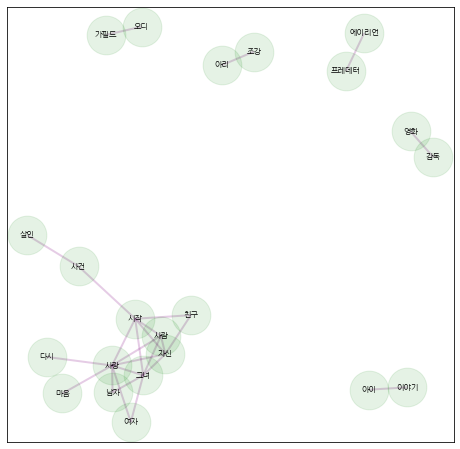

In [50]:
import networkx as nx

# Network Graph 생성
G = nx.from_pandas_edgelist(top_50)

fig,ax = plt.subplots(1, 1, figsize=(8,8))
layout = nx.spring_layout(G, k=.4)
nx.draw_networkx_nodes(G, pos=layout, node_size=1500, node_color='green', alpha=.1, ax=ax)
nx.draw_networkx_edges(G, pos=layout, width=2, edge_color='purple', alpha=.2, ax=ax)
nx.draw_networkx_labels(G, pos=layout, font_size=8, font_color='black', font_family='NanumGothic', ax=ax)
plt.show()

## Q 3

```
각 영화의 plot에서 어떤 단어가 보다 중요한지 분석하고자 한다.
TF-IDF를 통해 각 문서에서 가장 중요한 단어를 찾을 때, 첫 번째 문서에서 가장 중요한 단어와 그때의 TF-IDF 점수를 순서대로 기술하시오.
소수점 셋째 자리 아래는 버리고, 소수점 셋째 자리까지 기술하시오.
(답안예시) 소녀, 0.123
```

In [51]:
def tokenizer(raw, pos=["Noun"]):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopwords
        ]

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(
    tokenizer=tokenizer,
    min_df=2,
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)
X = vectorize.fit_transform(df['plot'])
features = vectorize.get_feature_names()

In [53]:
tfidf = pd.DataFrame(X.toarray(), columns=features)
tfidf

가게   가격   가공   가기  가까스로  가까이   가끔   가난   가늠  가능성  ...   희영   히로  \
0     0.140296  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...        ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
997   0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
998   0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
999   0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1000  0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1001  0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

      히로시  히로시마  히말라야   히스  히어로  히키코모리   히트  힐러리  
0     0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
1     0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
2     0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
3     0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
4     0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
...   ...   ...   ...  ...  ...    ...  ...  ...  
997   0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
998   0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
999   0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
1000  0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  
1001  0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  

[1002 rows x 4865 columns]

In [54]:
tfidf.iloc[0].sort_values(ascending=False).head()

호주     0.392011
인도     0.389974
깜빡     0.201938
대학원    0.193410
기차역    0.193410
Name: 0, dtype: float64